In [50]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2018') is None:
    pui2018 = os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json
#s = json.load( open(os.getenv('PUI2018') + "/wyw_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


In [51]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [52]:
datestring = '201704'
getCitiBikeCSV(datestring)

file in place, you can continue


# Idea:
## Young people are less likely to choose biking for commuting
# Null Hypothesis:
## The proportion of people whose age are under 30 year old (Y) biking on weekends is the same or lower than the proportion of people whose age are equal or over 30 years old (O) biking on weekends.
# _$H_0$_ : $\frac{Y_{\mathrm{weekend}}}{Y_{\mathrm{total}}} <= \frac{O_{\mathrm{weekend}}}{O_{\mathrm{total}}}$
# _$H_1$_ : $\frac{Y_{\mathrm{weekend}}}{Y_{\mathrm{total}}} > \frac{O_{\mathrm{total}}}{O_{\mathrm{total}}}$
## I will use a significance level  $\alpha=0.05$

In [53]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1,2017-04-01 00:00:58
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1,2017-04-01 00:01:54
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1,2017-04-01 00:01:56
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1,2017-04-01 00:02:24
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2,2017-04-01 00:02:36


In [54]:
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.315404e+06,1.315404e+06,1.315404e+06,1.315404e+06,1.315404e+06,1.315404e+06,1.315404e+06,1.315404e+06,1.146732e+06,1.315404e+06
mean,1.085863e+03,1.301595e+03,4.073695e+01,-7.398503e+01,1.296313e+03,4.073660e+01,-7.398515e+01,2.321637e+04,1.978600e+03,1.087354e+00
std,2.608589e+04,1.317271e+03,2.802218e-02,1.683575e-02,1.316380e+03,4.518291e-02,6.668075e-02,4.789893e+03,1.184778e+01,5.852278e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.404964e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.820000e+02,3.580000e+02,4.071882e+01,-7.399683e+01,3.580000e+02,4.071882e+01,-7.399705e+01,1.860800e+04,NaN,1.000000e+00
50%,6.490000e+02,4.830000e+02,4.073782e+01,-7.398752e+01,4.820000e+02,4.073705e+01,-7.398765e+01,2.532800e+04,NaN,1.000000e+00
75%,1.144000e+03,3.126000e+03,4.075601e+01,-7.397606e+01,3.124000e+03,4.075527e+01,-7.397621e+01,2.749800e+04,NaN,1.000000e+00
max,9.735948e+06,3.463000e+03,4.080421e+01,-7.392989e+01,3.463000e+03,4.080421e+01,0.000000e+00,2.969900e+04,2.001000e+03,2.000000e+00


In [55]:
df.groupby(df['usertype']).sum().reset_index()[['usertype', 'tripduration']]

,usertype,tripduration
0,Customer,461776013
1,Subscriber,966572815


In [56]:
df.groupby(df['usertype']).count().reset_index()[['usertype', 'tripduration']]

,usertype,tripduration
0,Customer,188860
1,Subscriber,1126544


In [57]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [58]:
df.head()

,birth year,date
0,1966.0,2017-04-01 00:00:58
1,1995.0,2017-04-01 00:01:54
2,1987.0,2017-04-01 00:01:56
3,1961.0,2017-04-01 00:02:24
4,1967.0,2017-04-01 00:02:36


In [59]:
#df.columns(index=str, columns={'birth year': 'birth_year'})

In [60]:
age_splitor = 2017 - 30

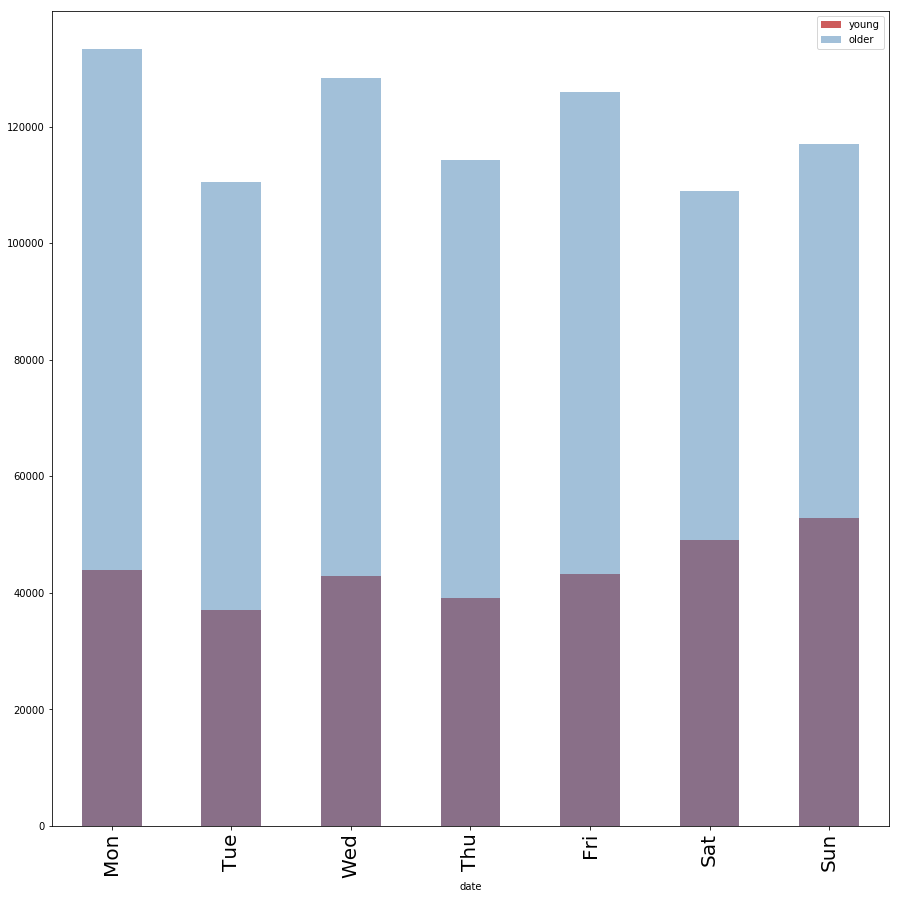

In [61]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
(df['date'][df['birth year'] > age_splitor].groupby([df['date'].dt.weekday]).count()).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='young')

ax = (df['date'][df['birth year'] <= age_splitor].groupby([df['date'].dt.weekday]).count()).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='older')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 1a: Distribution of Citibike bikers by age in April 2017, absolute counts

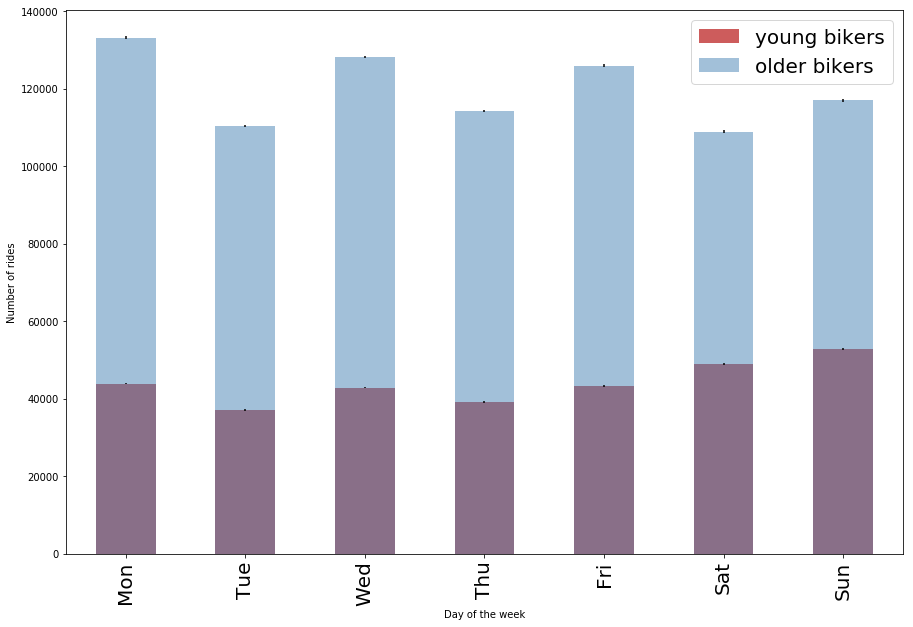

In [62]:
fig=pl.figure(figsize(15,10))

counts_y = (df['date'][df['birth year'] > age_splitor]).groupby([df.date.dt.weekday]).count()
norm_y = 1
error_y = np.sqrt(counts_y)
ax=((counts_y) / norm_y).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_y) / norm_y, (error_y) / norm_y)], label='young bikers')


counts_o = (df['date'][df['birth year'] <= age_splitor]).groupby([df.date.dt.weekday]).count()
norm_o = 1
error_o=np.sqrt(counts_o)
((counts_o) / norm_o).plot(kind="bar", alpha=0.5, yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                           color='SteelBlue', label='older bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['young bikers','older bikers'],fontsize=20)

## Figure 1b: Distribution of Citibike bikers by age in April 2017, absolute counts, with statistical errors

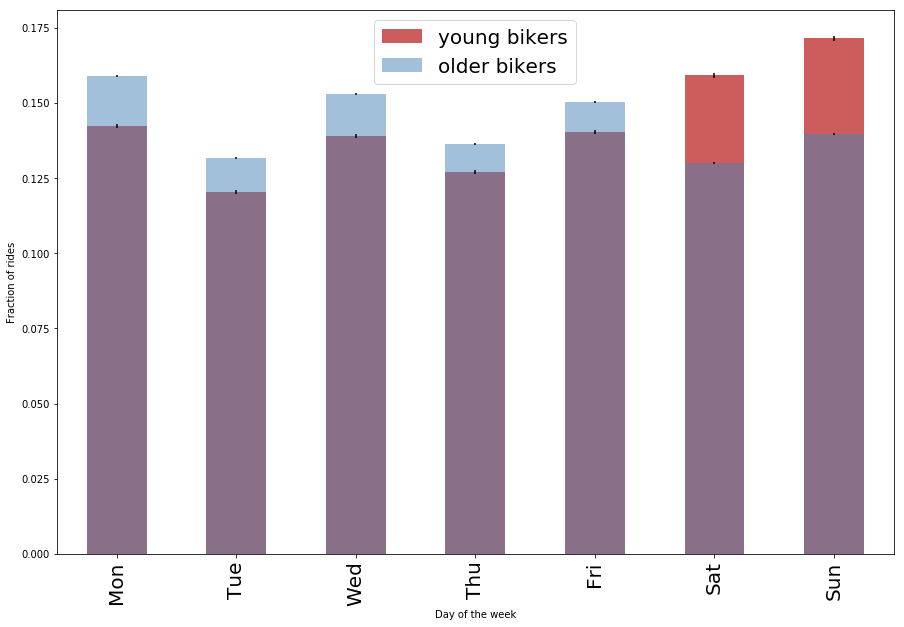

In [63]:
fig = pl.figure(figsize(15,10))

norm_y = counts_y.sum()
error_y = np.sqrt(counts_y)
((counts_y) / norm_y).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                           label='young bikers')

norm_o = counts_o.sum()
ax = ((counts_o) / norm_o).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                                color='SteelBlue', label='older bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['young bikers','older bikers'],fontsize=20)



## Figure 2: Distribution of Citibike bikers by age in April 2017, normalized

In [64]:
week_y = sum(counts_y[:-2]) / norm_y
weekend_y = sum(counts_y[-2:]) / norm_y

week_o = sum(counts_o[:-2]) / norm_o
weekend_o = sum(counts_o[-2:]) / norm_o

In [65]:
P0mP1 = weekend_y - weekend_o
print ("difference between man and women on weekend: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend:  0.06094294269
We must check the significance before we reject the Null Hypothesis


In [66]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_y, weekend_o, norm_y, norm_o), norm_y, norm_o)
# print (sp_stdev_mw)
z = zscore(weekend_y, weekend_o, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is 64.04


## A z score of 64.04 is statistically significant. Therefore, we reject the Null Hypothesis that older people are more likely to commute than younger people.